# 3.2 Machine Learning section.

>We will proceed like we did with labels `relevance` but with `positivity`.

>We only have 1,420 datapoints, so we will drop the missing values (inputting to the mean introduces bias, as we described before).

>`positivity` ranges from `2` to `9`, so we will create two classes: one class grouping from `2` to `5`, and the other one grouping `6` to `9`, which is totally arbitrarely.

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import string
import re
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import nltk
import nlp_ml_functions
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import label_binarize, MultiLabelBinarizer, binarize, FunctionTransformer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
sns.set_style('white')

## Using `positivity` as labels.

### Loading dataset into a pandas dataframe.

In [3]:
economic_pos_df = pd.read_pickle("positive_df")

## 1- Creating models.

In [4]:
X_article = economic_pos_df['article_text']
y_article = economic_pos_df['positivity']

In [5]:
X_train_article, X_test_article, y_train_article, y_test_article = train_test_split(X_article, y_article, test_size=0.3, random_state=42)

### Logistic Regression.

In [6]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', LogisticRegression())])

In [7]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [8]:
predictions = pipeline.predict(X_test_article)

In [9]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

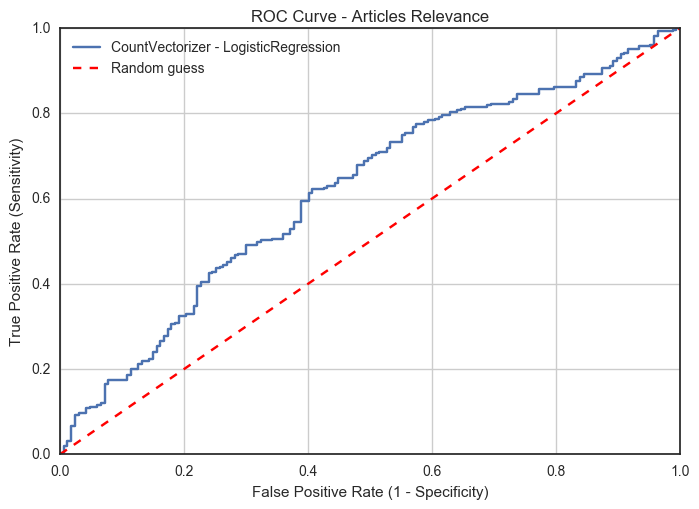

In [10]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - LogisticRegression", "Articles Relevance")

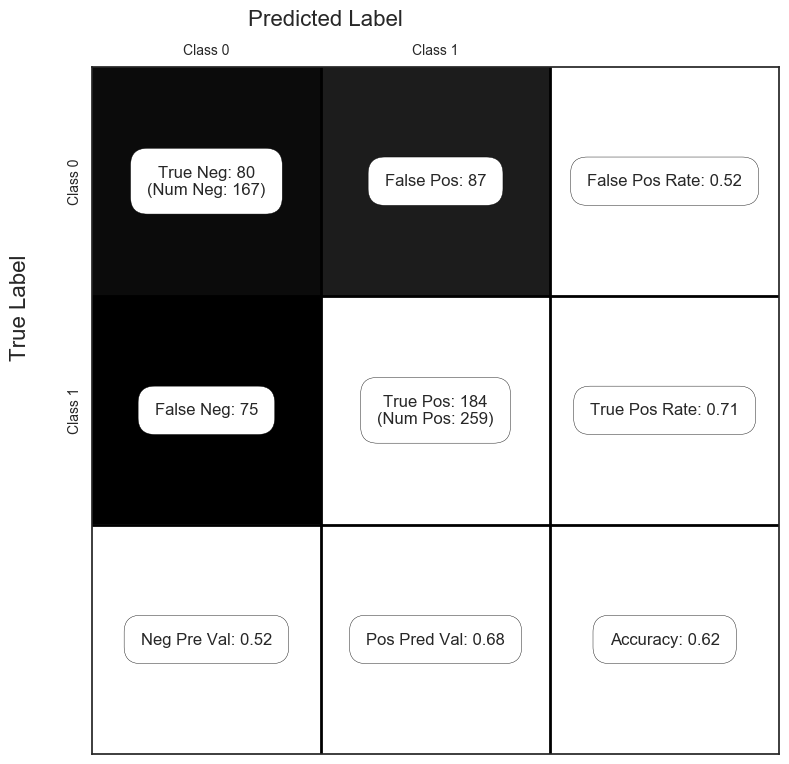

In [11]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [12]:
nlp_ml_functions.classification_metrics("LogisticRegression", y_test_article, predictions)

Precision Score of LogisticRegression model: 67.90%

AUC: 59.47%

Accuracy Score of LogisticRegression model: 61.97%

Recall Score of LogisticRegression model: 71.04%

F1 Score of LogisticRegression model: 69.43%

Classification Report of LogisticRegression:

              precision    recall  f1-score   support

          0       0.52      0.48      0.50       167
          1       0.68      0.71      0.69       259

avg / total       0.62      0.62      0.62       426



### k-nearest neighbors classifier.

In [13]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', KNeighborsClassifier())])

In [14]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [15]:
predictions = pipeline.predict(X_test_article)

In [16]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

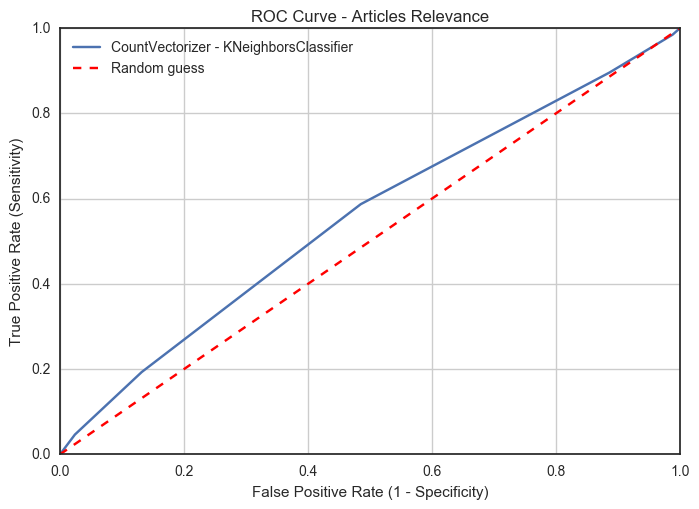

In [17]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - KNeighborsClassifier", "Articles Relevance")

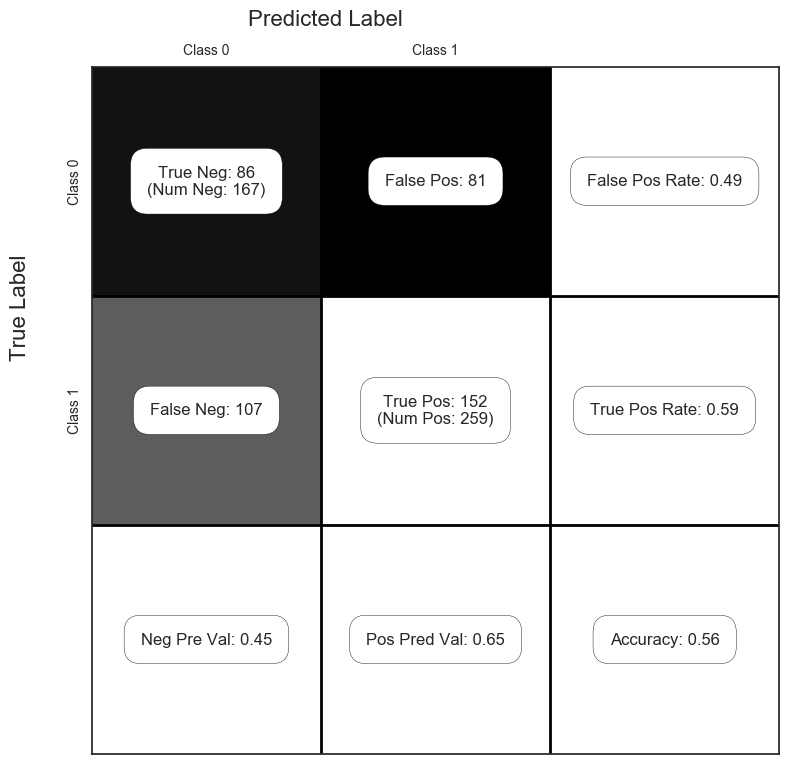

In [18]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [19]:
nlp_ml_functions.classification_metrics("KNeighborsClassifier", y_test_article, predictions)

Precision Score of KNeighborsClassifier model: 65.24%

AUC: 55.09%

Accuracy Score of KNeighborsClassifier model: 55.87%

Recall Score of KNeighborsClassifier model: 58.69%

F1 Score of KNeighborsClassifier model: 61.79%

Classification Report of KNeighborsClassifier:

              precision    recall  f1-score   support

          0       0.45      0.51      0.48       167
          1       0.65      0.59      0.62       259

avg / total       0.57      0.56      0.56       426



### Naive-Bayes Multinomial.

In [20]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', MultinomialNB())])

In [21]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
predictions = pipeline.predict(X_test_article)

In [23]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

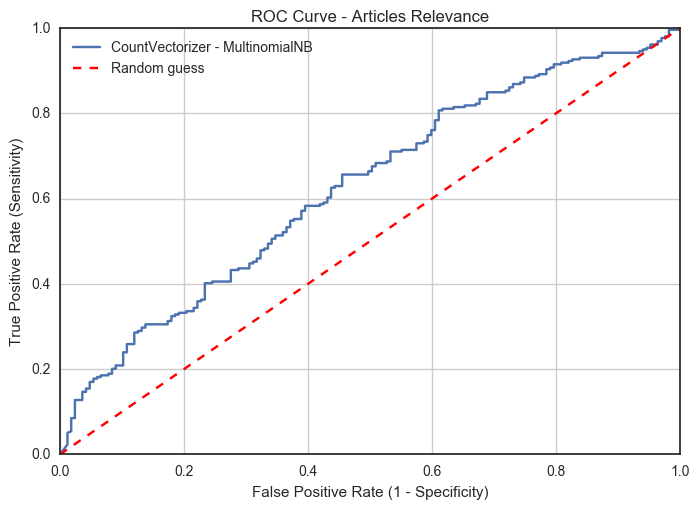

In [24]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - MultinomialNB", "Articles Relevance")

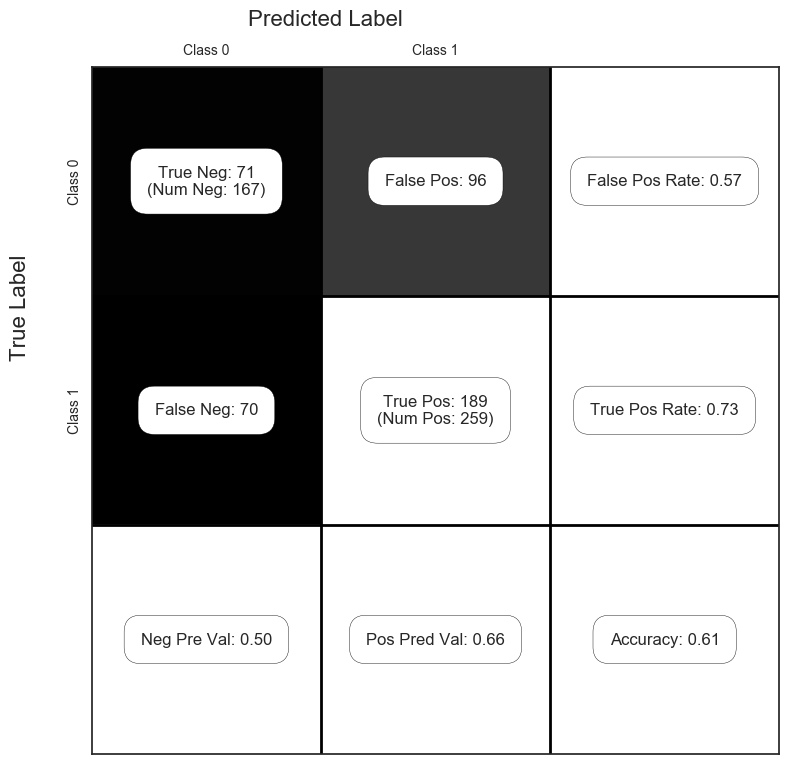

In [25]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [26]:
nlp_ml_functions.classification_metrics("MultinomialNB", y_test_article, predictions)

Precision Score of MultinomialNB model: 66.32%

AUC: 57.74%

Accuracy Score of MultinomialNB model: 61.03%

Recall Score of MultinomialNB model: 72.97%

F1 Score of MultinomialNB model: 69.49%

Classification Report of MultinomialNB:

              precision    recall  f1-score   support

          0       0.50      0.43      0.46       167
          1       0.66      0.73      0.69       259

avg / total       0.60      0.61      0.60       426



### Naive-Bayes Bernoulli.

In [27]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', BernoulliNB())])

In [28]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...lary=None)), ('classifier', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

In [29]:
predictions = pipeline.predict(X_test_article)

In [30]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

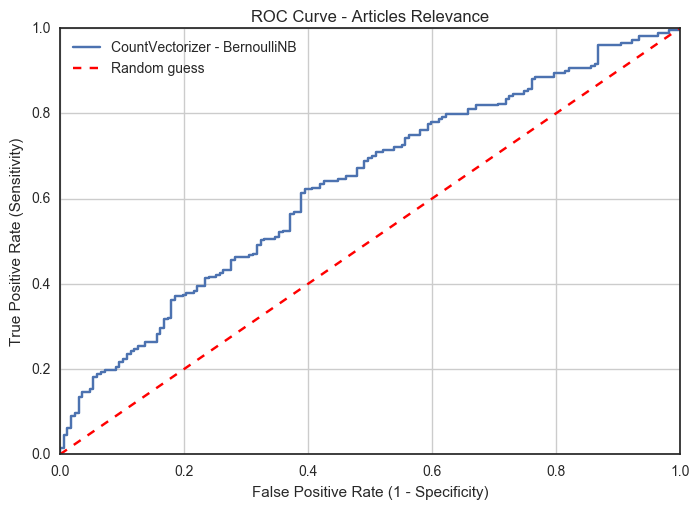

In [31]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - BernoulliNB", "Articles Relevance")

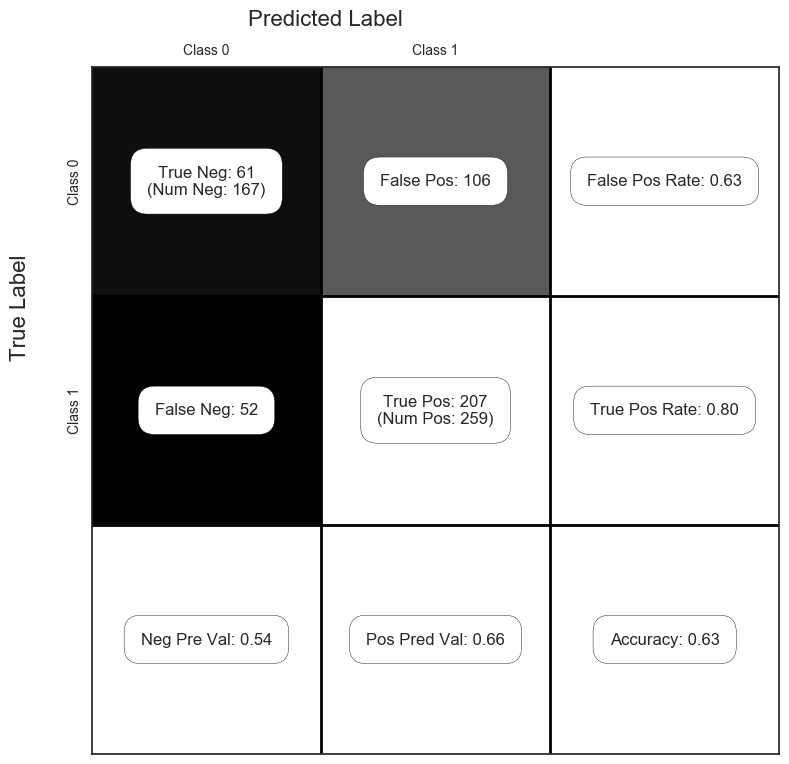

In [32]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [33]:
nlp_ml_functions.classification_metrics("BernoulliNB", y_test_article, predictions)

Precision Score of BernoulliNB model: 66.13%

AUC: 58.22%

Accuracy Score of BernoulliNB model: 62.91%

Recall Score of BernoulliNB model: 79.92%

F1 Score of BernoulliNB model: 72.38%

Classification Report of BernoulliNB:

              precision    recall  f1-score   support

          0       0.54      0.37      0.44       167
          1       0.66      0.80      0.72       259

avg / total       0.61      0.63      0.61       426



### RandomForestClassifier.

In [34]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', RandomForestClassifier())])

In [35]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])

In [36]:
predictions = pipeline.predict(X_test_article)

In [37]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

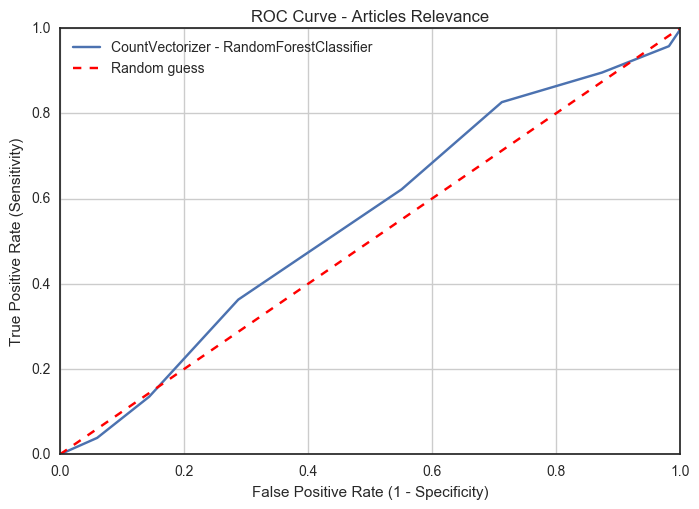

In [38]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - RandomForestClassifier", "Articles Relevance")

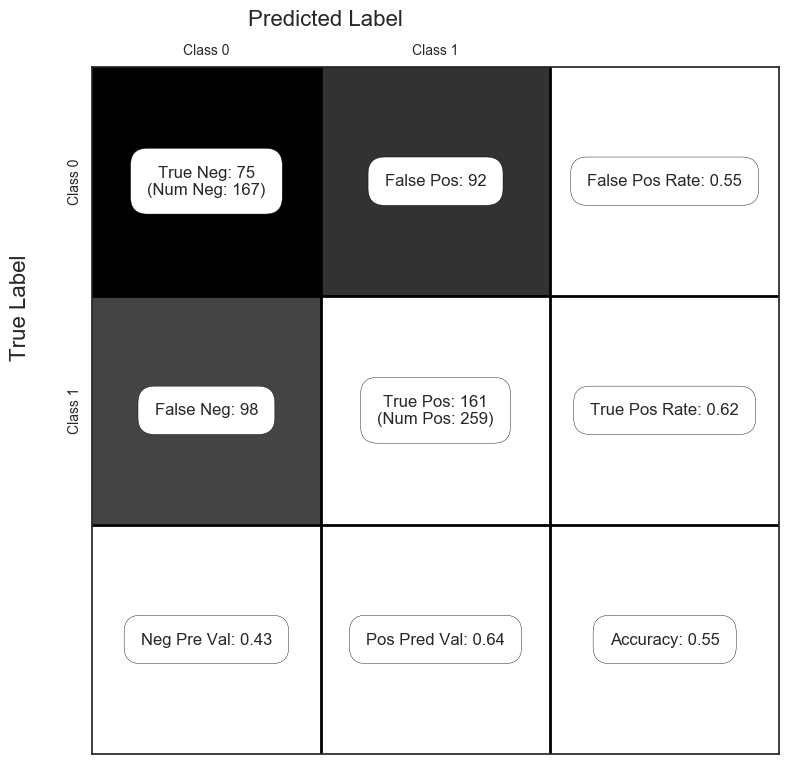

In [39]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [40]:
nlp_ml_functions.classification_metrics("RandomForestClassifier", y_test_article, predictions)

Precision Score of RandomForestClassifier model: 63.64%

AUC: 53.54%

Accuracy Score of RandomForestClassifier model: 55.40%

Recall Score of RandomForestClassifier model: 62.16%

F1 Score of RandomForestClassifier model: 62.89%

Classification Report of RandomForestClassifier:

              precision    recall  f1-score   support

          0       0.43      0.45      0.44       167
          1       0.64      0.62      0.63       259

avg / total       0.56      0.55      0.56       426



### AdaBoostClassifier.

In [41]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', AdaBoostClassifier())])

In [42]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [43]:
predictions = pipeline.predict(X_test_article)

In [44]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

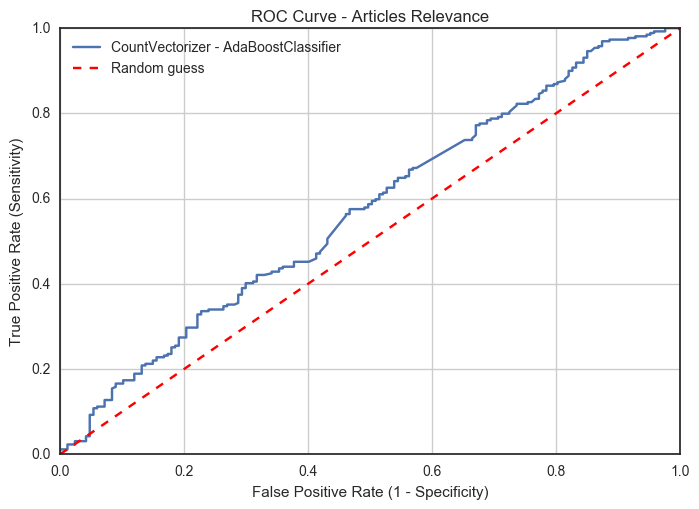

In [45]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - AdaBoostClassifier", "Articles Relevance")

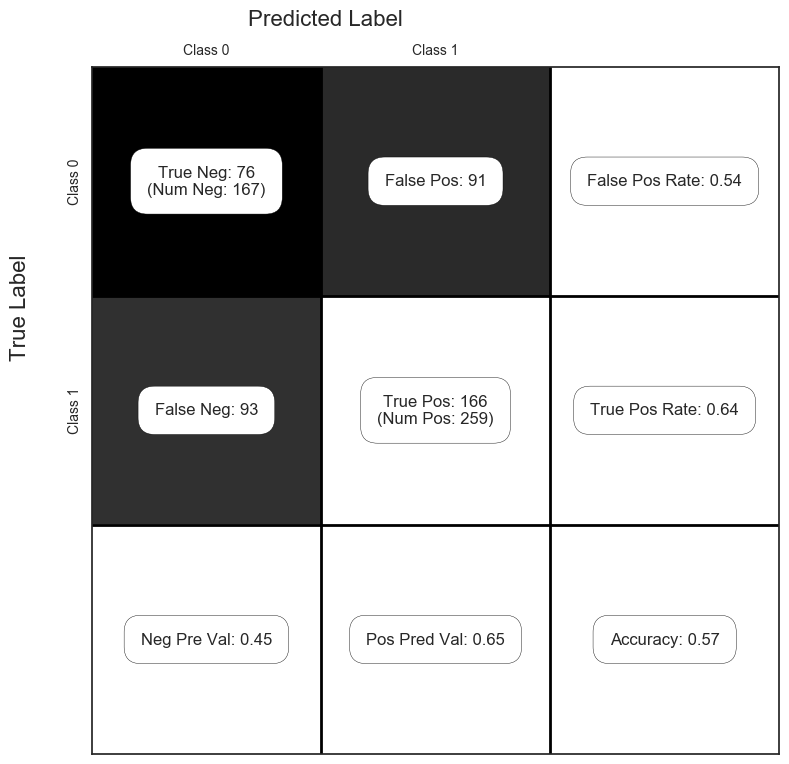

In [46]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [47]:
nlp_ml_functions.classification_metrics("AdaBoostClassifier", y_test_article, predictions)

Precision Score of AdaBoostClassifier model: 64.59%

AUC: 54.80%

Accuracy Score of AdaBoostClassifier model: 56.81%

Recall Score of AdaBoostClassifier model: 64.09%

F1 Score of AdaBoostClassifier model: 64.34%

Classification Report of AdaBoostClassifier:

              precision    recall  f1-score   support

          0       0.45      0.46      0.45       167
          1       0.65      0.64      0.64       259

avg / total       0.57      0.57      0.57       426



### GradientBoostingClassifier.

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

http://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required

In [48]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('to_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),('classifier', GradientBoostingClassifier())])

In [49]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])

In [50]:
predictions = pipeline.predict(X_test_article)

In [51]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

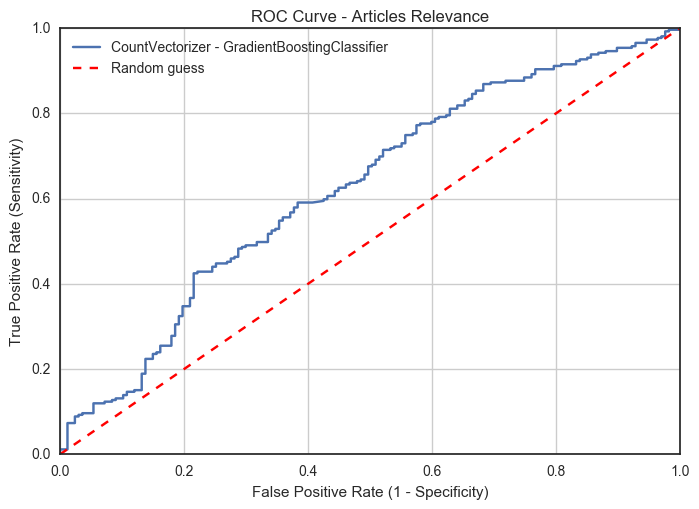

In [52]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - GradientBoostingClassifier", "Articles Relevance")

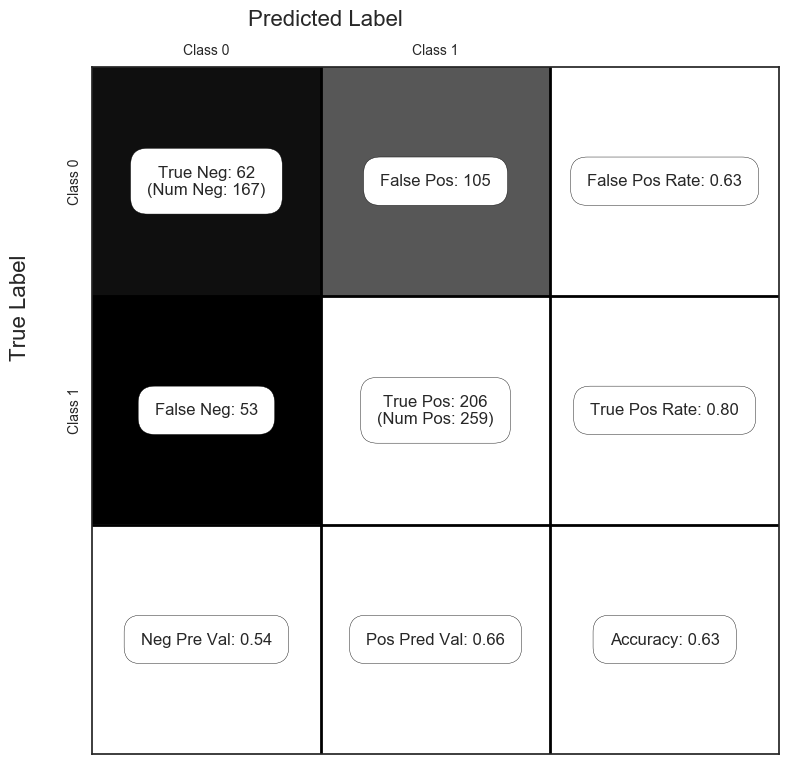

In [53]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [54]:
nlp_ml_functions.classification_metrics("GradientBoostingClassifier", y_test_article, predictions)

Precision Score of GradientBoostingClassifier model: 66.24%

AUC: 58.33%

Accuracy Score of GradientBoostingClassifier model: 62.91%

Recall Score of GradientBoostingClassifier model: 79.54%

F1 Score of GradientBoostingClassifier model: 72.28%

Classification Report of GradientBoostingClassifier:

              precision    recall  f1-score   support

          0       0.54      0.37      0.44       167
          1       0.66      0.80      0.72       259

avg / total       0.61      0.63      0.61       426



### SVM.

In [55]:
pipeline = Pipeline([('bow', CountVectorizer(analyzer=nlp_ml_functions.process_dataframe_text)),('classifier', SVC(probability=True))])

In [56]:
pipeline.fit(X_train_article, y_train_article)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function process_dataframe_text at 0x113dbeb70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [57]:
predictions = pipeline.predict(X_test_article)

>SVM predictions are labeled as `1` and `-1`. We convert `-1` to `0`.

In [58]:
predictions = np.where(predictions < 1, 0, 1)

In [59]:
predictions_probability = pipeline.predict_proba(X_test_article)

#### Model evaluation.

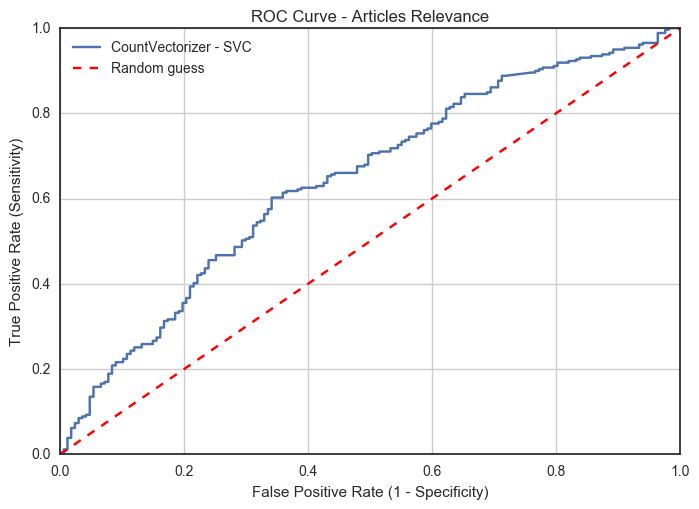

In [60]:
nlp_ml_functions.plot_roc(y_test_article, predictions_probability[:,1], "CountVectorizer - SVC", "Articles Relevance")

/Users/carles/DSCI6004-student/week_8/8_2_final_project/FinalProject-CPM/nlp_ml_functions.py:259: RuntimeWarning: invalid value encountered in true_divide
  'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),


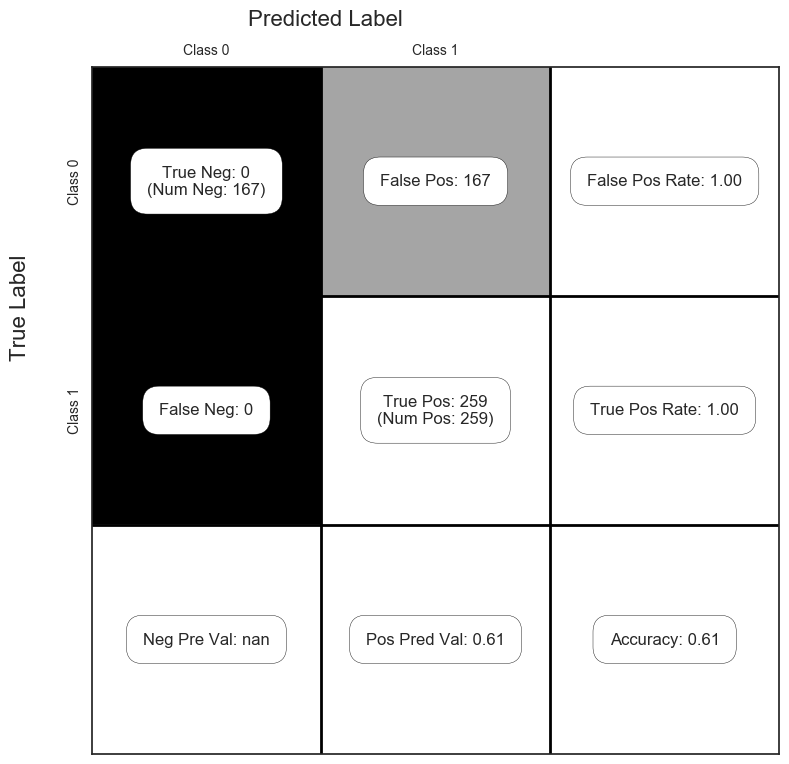

In [61]:
nlp_ml_functions.show_confusion_matrix(confusion_matrix(y_test_article, predictions), ['Class 0', 'Class 1'])

In [62]:
nlp_ml_functions.classification_metrics("SVC", y_test_article, predictions)

Precision Score of SVC model: 60.80%

AUC: 50.00%

Accuracy Score of SVC model: 60.80%

Recall Score of SVC model: 100.00%

F1 Score of SVC model: 75.62%

Classification Report of SVC:

              precision    recall  f1-score   support

          0       0.00      0.00      0.00       167
          1       0.61      1.00      0.76       259

avg / total       0.37      0.61      0.46       426



//anaconda/envs/nlp/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


>### The models selected are:
>* Logistic Regression.
* MultinomialNB.
* BernoulliNB.
* RandomForestClassifier.
* AdaBoostClassifier.
* GradientBoostingClassifier.